# Analysis of 'German Credit Data' dataset using Decision Tree Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("German Credit Data.csv")
df

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,1736,A61,A74,3,A92,4,31,A143,1,A172,0
996,A11,30,A32,3857,A61,A73,4,A91,4,40,A143,1,A174,0
997,A14,12,A32,804,A61,A75,4,A93,4,38,A143,1,A173,0
998,A11,45,A32,1845,A61,A73,4,A93,4,23,A143,1,A173,1


In [2]:
# Creating dictionaries to map the catogorical attributes
checkin_acc = {"A11":1,"A12":2,"A13":3,"A14":4}
credit_history = {"A30":1,"A31":2,"A32":3,"A33":4,"A34":5}
savings_acc = {"A61":1,"A62":2,"A63":3,"A64":4,"A65":5}
present_emp_since = {"A71":1,"A72":2,"A73":3,"A74":4,"A75":5}
personal_status = {"A91":1,"A92":2,"A93":3,"A94":4}
inst_plans = {"A141":1,"A142":2,"A143":3}
job = {"A171":1,"A172":2,"A173":3,"A174":4}

# Maping catogorical attributes to numeric values
df["checkin_acc"] = df["checkin_acc"].map(checkin_acc)
df["credit_history"] = df["credit_history"].map(credit_history)
df["savings_acc"] = df["savings_acc"].map(savings_acc)
df["present_emp_since"] = df["present_emp_since"].map(present_emp_since)
df["personal_status"] = df["personal_status"].map(personal_status)
df["inst_plans"] = df["inst_plans"].map(inst_plans)
df["job"] = df["job"].map(job)



In [3]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [5]:
f_names = list(df.iloc[:,:-1].columns)
f_names

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

<h3>Use  “sklearn.model_selection”    and  GridSearchCV  to  search  the  hyperparameter  values  and  report  the  most  optimal one</h3>

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier ,plot_tree
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = MinMaxScaler()
# We can use MinMaxScaler or StandardScaler to reduce bias in the attributes
# x_train = scaler.fit_transform(x_train)
params = {
'criterion': ['gini', 'entropy'], 
'max_depth': [2,3,4,5,6,7,8,9,10,None], 
}

clf = DecisionTreeClassifier(random_state=1)
gs = GridSearchCV(clf,param_grid = params,cv=10)
gs.fit(x_train,y_train)
gs.best_params_



{'criterion': 'gini', 'max_depth': 4}

In [7]:
# The best Decision tree is the one with criterion as 'Gini' and max_depth as 3
best_clf = DecisionTreeClassifier(criterion='gini',max_depth=3)
best_clf.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=3)

<h3>Visualizing the Decision Tree.</h3>

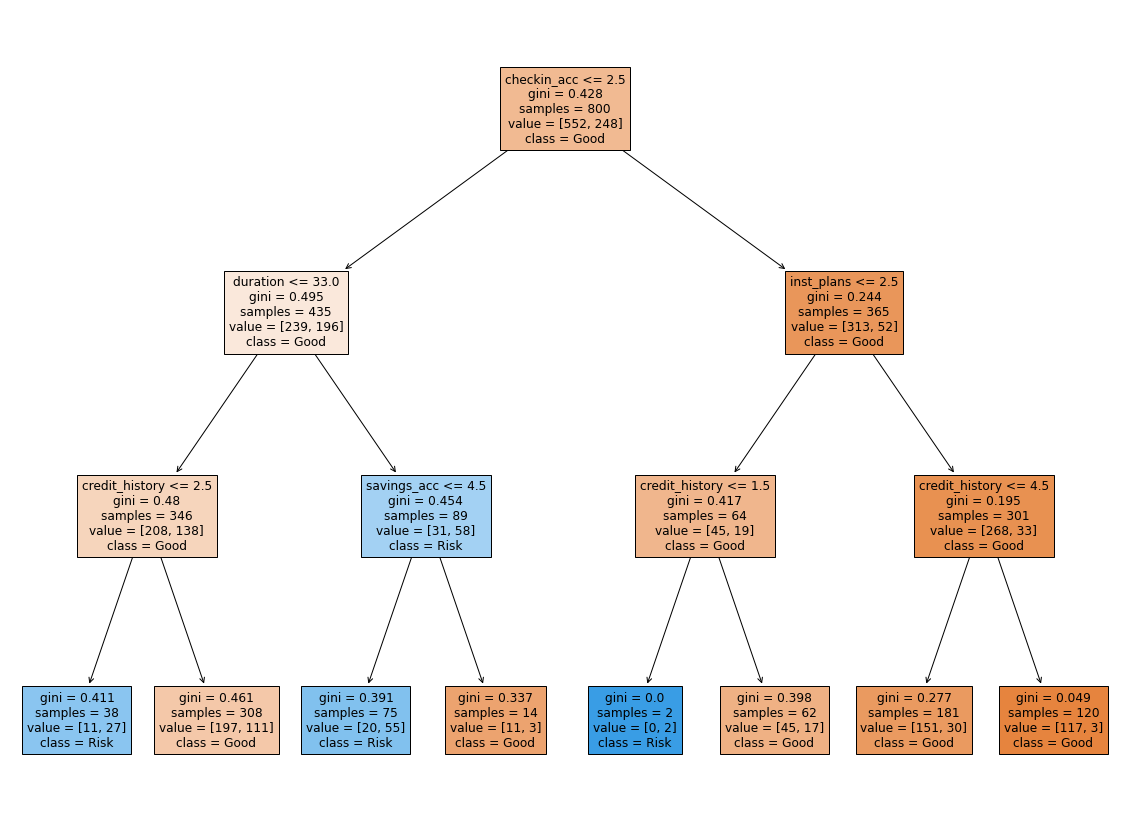

In [9]:
# Vizualizing the Decision tree without using Graphviz library
plt.figure(figsize=(20,15))
plot_tree(best_clf,filled=True,feature_names=f_names,class_names=['Good','Risk'])
plt.show()


In [16]:
# Vizualization using Graphviz Library
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus


In [17]:
dot_data = StringIO()  

export_graphviz(best_clf, out_file=dot_data, filled=True, rounded=True,
                feature_names=f_names, 
                class_names=['Good', "Risk"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# It works fine in google colab


InvocationException: GraphViz's executables not found

<h3>Model Evaluation</h3>

In [18]:
y_pred = best_clf.predict(x_test)

In [19]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test,y_pred)
score


0.6195426195426196

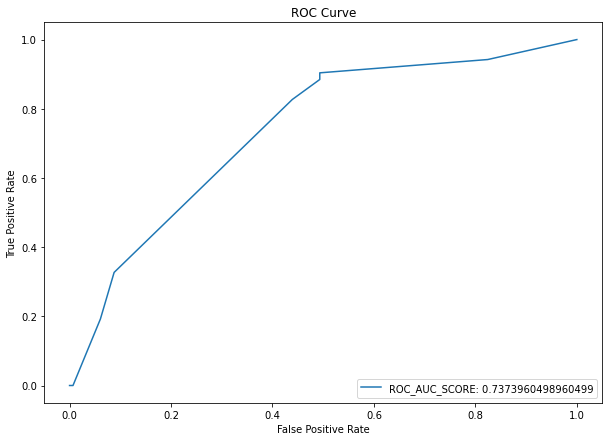

In [20]:
# Accuracy 
from sklearn import metrics
y_pred_prob = best_clf.predict_proba(x_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
r=roc_auc_score(y_test,y_pred_prob)
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,label="ROC_AUC_SCORE: "+str(r))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve")
plt.legend(loc=4)
plt.show()

<h3>Display the text representation of the rules learnt.</h3>

In [21]:
from sklearn import tree
text_representation = tree.export_text(best_clf,feature_names=f_names)
print(text_representation)


|--- checkin_acc <= 2.50
|   |--- duration <= 33.00
|   |   |--- credit_history <= 2.50
|   |   |   |--- class: 1
|   |   |--- credit_history >  2.50
|   |   |   |--- class: 0
|   |--- duration >  33.00
|   |   |--- savings_acc <= 4.50
|   |   |   |--- class: 1
|   |   |--- savings_acc >  4.50
|   |   |   |--- class: 0
|--- checkin_acc >  2.50
|   |--- inst_plans <= 2.50
|   |   |--- credit_history <= 1.50
|   |   |   |--- class: 1
|   |   |--- credit_history >  1.50
|   |   |   |--- class: 0
|   |--- inst_plans >  2.50
|   |   |--- credit_history <= 4.50
|   |   |   |--- class: 0
|   |   |--- credit_history >  4.50
|   |   |   |--- class: 0

